In [107]:
import pandas as pd
import numpy as np

### Read csv File

In [108]:
df = pd.read_csv('marina_sheet.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [109]:
df = df.set_index('State')
df = df.sort_index()
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,0.00,116983.80,45173.06,14681.40
California,23640.93,96189.63,148001.11,71498.49
California,28754.33,118546.05,172795.67,78239.91
California,46426.07,157693.92,210797.67,96712.80
California,78013.11,121597.55,264346.06,126992.93


# The Max State Pay on R&D with relate to its Profit


### Grouping data accord to State

In [110]:
for group, frame in df.groupby('State'):
    avg = np.average(frame['R&D Spend'])
    avg_profit = np.average(frame['Profit'])

    print('Counties in state ' + group + ' have an average R&D Spend of ' + str(avg)+ ' with Profit ' +str(avg_profit))

Counties in state California have an average R&D Spend of 64657.6741176 with Profit 103905.175294
Counties in state Florida have an average R&D Spend of 80724.01625 with Profit 118774.024375
Counties in state New York have an average R&D Spend of 76195.0623529 with Profit 113756.446471


###  Get the Average R&D and Average Profit

In [111]:
df_State=(df.groupby('State')['R&D Spend','Profit']
    .agg({'R&D Spend': np.average, 'Profit': np.average}))
df_State['precentage']=df_State.apply(lambda x: np.divide(x['R&D Spend'],x['Profit']), axis=1)
df_State

,R&D Spend,Profit,precentage
State,,,
California,64657.674118,103905.175294,0.622276
Florida,80724.016250,118774.024375,0.679644
New York,76195.062353,113756.446471,0.669809


###  Get the State of maximum precentage

In [112]:
df_State['precentage'].argmax()
    

'Florida'

# The Max State Pay on Marketing with relate to its Profit

In [113]:
df_State2=(df.groupby('State')['Marketing Spend','Profit']
    .agg({'Marketing Spend': np.average, 'Profit': np.average}))
df_State2['precentage']=df_State2.apply(lambda x: np.divide(x['Marketing Spend'],x['Profit']), axis=1)
df_State2

,Marketing Spend,Profit,precentage
State,,,
California,182540.929412,103905.175294,1.756803
Florida,247323.551250,118774.024375,2.082303
New York,205346.015882,113756.446471,1.805137


In [114]:
df_State2['precentage'].argmax()


'Florida'

# Relation R&D and Profit

## Scatter plot

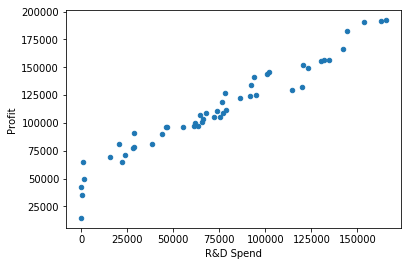

In [115]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='R&D Spend',y='Profit')
plt.show()

From graph it seems to be positive correlatted